In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
class raw_data():
    

    def __init__(self, raw_real_file_name, raw_imag_file_name, slope=6.0012 * 1e13, number_of_samples_per_second=4.4 * 1e6):

        # self.slope = 2.9982 * 1e13
        # self.number_of_samples_per_second = 10 * 1e6
        self.slope = slope
        self.number_of_samples_per_second = number_of_samples_per_second
        speed_of_light = 2.99792458 * 1e8
        self.speed_of_light = 2.99792458 * 1e8
        self.complex_data = self.read_complex_data(raw_real_file_name, raw_imag_file_name)

        self.all_distances = []
        self.x_fft = []
        self.peak_distances = []
        self.peak_idx = []
        self.find_distance(self.complex_data)
    


    def read_complex_data(self, raw_real_file_name, raw_imag_file_name):
        '''
        read real and imag data from file and return the complex data
        return: complex_data (N x bin_size)
        '''
        real_data = []
        imag_data = []
        complex_data = []
        with open(raw_real_file_name, "r") as f:
            real_data = [batch.split(",")[:-1] for batch in f.readlines()]
        with open(raw_imag_file_name, "r") as f:
            imag_data = [batch.split(",")[:-1] for batch in f.readlines()]

        if len(real_data) != len(imag_data):
            raise("real and imag data does not have same len")

        complex_data = np.array(real_data, dtype=int) + np.array(imag_data, dtype=complex)
        return complex_data

    def find_distance(self, all_complex_data):
        x_fft = []
        peak_distances = []
        peak_idx = []


        number_of_samples = len(all_complex_data[0])
        fundamental_frequency = self.number_of_samples_per_second/number_of_samples
        frequencies = np.linspace(0, number_of_samples, number_of_samples)*fundamental_frequency
        self.all_distances = frequencies * self.speed_of_light / (2 * self.slope)

        for data in all_complex_data:
            iq_frequency = np.fft.fft(data)

            magnitude = np.abs(iq_frequency)
            max_idx = np.argmax(magnitude)
            frequency_peak = frequencies[max_idx]
            distance = (frequency_peak * self.speed_of_light) / (2 * self.slope)

            x_fft.append(iq_frequency)
            peak_distances.append(distance)
            peak_idx.append(max_idx)

        self.x_fft = np.array(x_fft)
        self.peak_distances = np.array(peak_distances)
        self.peak_idx = np.array(peak_idx)

        # return np.array(x_fft), np.array(peak_distances)

In [3]:
raw_real_file_name_1 = "real_converted_data_1.txt"
raw_imag_file_name_1 = "imag_converted_data_1.txt"
chan1 = raw_data(raw_real_file_name_1, raw_imag_file_name_1)
# all_complex_data_1 = read_complex_data(raw_real_file_name_1, raw_imag_file_name_1)
# all_distances_list_1, magnitude_list_1, peak_distances_1 = find_distance(all_complex_data_1)

In [4]:
raw_real_file_name_2 = "real_converted_data_2.txt"
raw_imag_file_name_2 = "imag_converted_data_2.txt"
chan2 = raw_data(raw_real_file_name_2, raw_imag_file_name_2)
# all_complex_data_2 = read_complex_data(raw_real_file_name_2, raw_imag_file_name_2)
# all_distances_list_2, magnitude_list_2, peak_distances_2 = find_distance(all_complex_data_2)

In [5]:
raw_real_file_name_3 = "real_converted_data_3.txt"
raw_imag_file_name_3 = "imag_converted_data_3.txt"
chan3 = raw_data(raw_real_file_name_3, raw_imag_file_name_3)
# all_complex_data_3 = read_complex_data(raw_real_file_name_3, raw_imag_file_name_3)
# all_distances_list_3, magnitude_list_3, peak_distances_3 = find_distance(all_complex_data_3)

In [6]:
N = 256
slope = 2.9982 * 1e13
number_of_samples_per_second = 10 * 1e6
speed_of_light = 2.99792458 * 1e8

resolution = speed_of_light*number_of_samples_per_second/2/slope/N
print(resolution, resolution*N)

0.19529455824536385 49.995406910813145


In [129]:
number_of_samples_per_second/256

39062.5

In [55]:
def norm_angle(angles):
    angles = np.array(angles)%(2*np.pi)
    idx = np.argwhere(angles > np.pi)
    angles[idx] = 2*np.pi - angles[idx]
    return angles

In [166]:
speed_of_light/78e9

0.0038434930512820514

In [11]:
N=256
slope = 6.0012 * 1e13
number_of_samples_per_second = 4.4 * 1e6
speed_of_light = 2.99792458 * 1e8


wave_length = speed_of_light/(77*1e9)

In [8]:
speed_of_light/(77*1e9) - speed_of_light/(78*1e9)

4.991549417249393e-05

In [186]:
x = chan1.x_fft
peak_idx = chan1.peak_idx
delta_phase = np.angle(x[1:]/x[:-1])
max_phase = np.array([delta_phase[i][idx] for i, idx in enumerate(peak_idx[:-1])])
phase_dist = max_phase/2/np.pi*wave_length

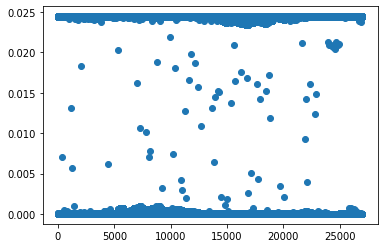

In [187]:
y = delta_phase%(2*np.pi)*wave_length
y = [y[i][idx] for i, idx in enumerate(peak_idx[:-1])]
plt.scatter(np.arange(len(y)), y)

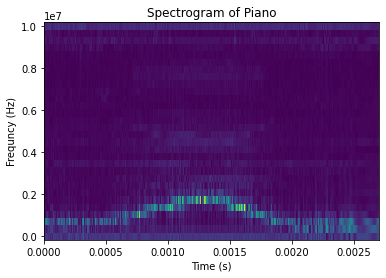

In [77]:
eps = 1e-16
slope = 2.9982 * 1e13
number_of_samples_per_second = 10 * 1e6
speed_of_light = 2.99792458 * 1e8

x = np.abs(chan2.x_fft)


t = np.linspace(0, len(x)/number_of_samples_per_second, np.shape(x)[0])
freq = np.linspace(0, number_of_samples_per_second, 30)
plt.figure()
plt.pcolormesh(t[:], freq, np.abs(x.T)[:30], shading='auto')
plt.title("Spectrogram of Piano")
plt.xlabel("Time (s)")
plt.ylabel("Frequncy (Hz)")
plt.show()

In [59]:
number_of_samples_per_second = 10 * 1e6
angle = delta_phase*number_of_samples_per_second

In [73]:
phase_diff = np.angle(chan1.x_fft/chan2.x_fft)

matching_phase = []
matching_distance = []
matching_magnitude = []
for i in range(len(chan1.peak_idx)):
    if chan1.peak_idx[i] == chan2.peak_idx[i]:
        matching_phase.append(phase_diff[i][chan1.peak_idx[i]])
        matching_distance.append(chan1.peak_distances[i])
        matching_magnitude.append(np.abs(chan1.x_fft[i][chan1.peak_idx[i]]))
matching_phase = np.array(matching_phase)
matching_distance = np.array(matching_distance)
matching_magnitude = np.array(matching_magnitude)

neg_idx = np.argwhere(matching_phase < 0)

phase_min = -1/wave_length*2e-3
phase_max = 1/wave_length*2e-3
# angles = np.arcsin(np.abs(matching_phase)*wave_length/2e-3)
angles = matching_phase/(phase_max-phase_min)
angles[neg_idx] = np.pi - angles[neg_idx]

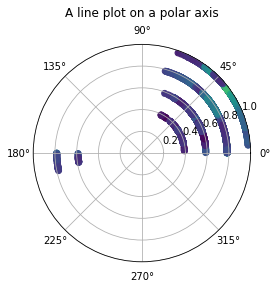

In [74]:
r = matching_distance
theta = angles
z = matching_magnitude

# rad = np.linspace(0, 5, 100)
# azm = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r, c=z)

ax.set_rmax(1)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [4]:
raw_real_file_name_1 = "heart/real_converted_data_1.txt"
raw_imag_file_name_1 = "heart/imag_converted_data_1.txt"
chan = raw_data(raw_real_file_name_1, raw_imag_file_name_1)


In [5]:
np.mean(chan.peak_distances[10000])

0.4309879250293732

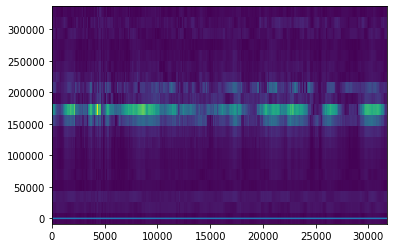

In [17]:
plt.plot(chan.peak_distances)
t = np.arange(len(chan.x_fft))
f = np.linspace(0, chan.number_of_samples_per_second, len(chan.x_fft[0]))[:20]
plt.pcolormesh(t, f, np.abs(chan.x_fft.T)[:20])

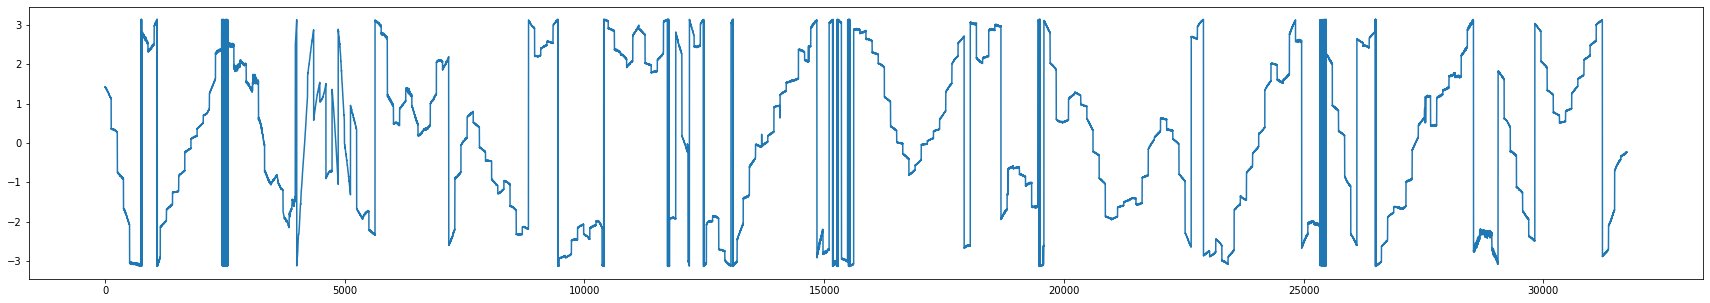

In [83]:
phase = [np.angle(chan.complex_data[i][idx]) for i, idx in enumerate(chan.peak_idx)]
plt.figure(figsize=(30,5))
plt.plot(phase)

In [100]:
-3%2

1

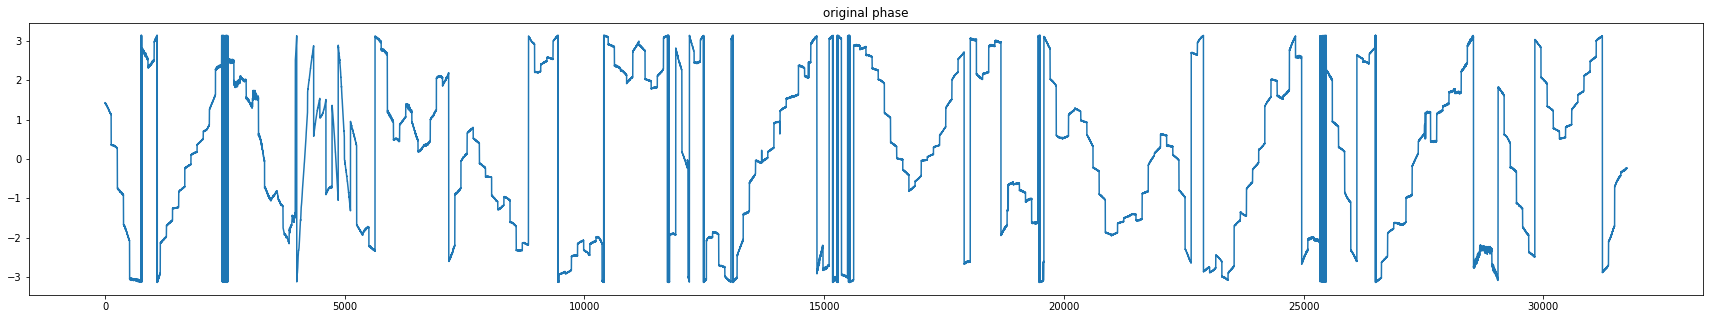

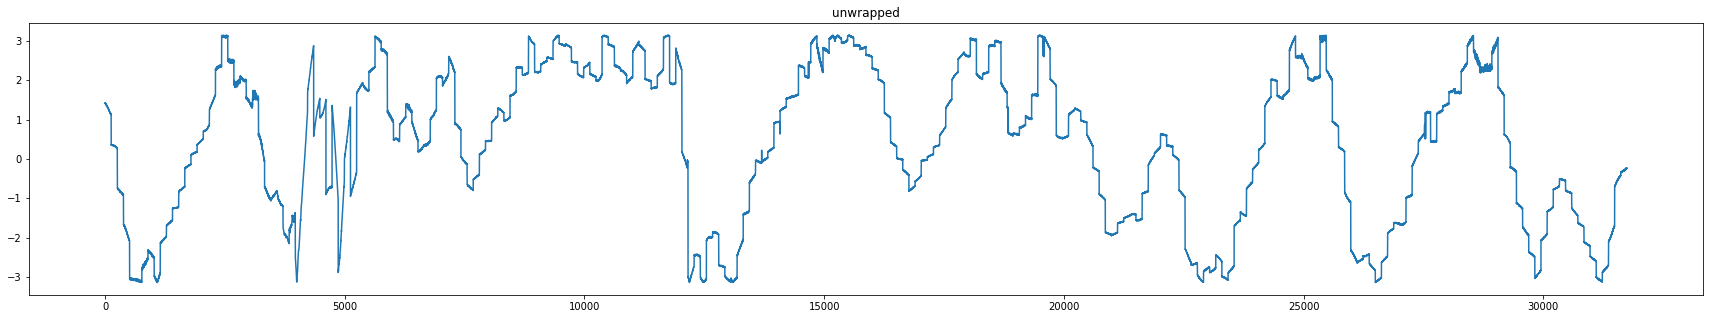

In [120]:
unwrapped = np.unwrap(phase)
out = [unwrapped[0]]
flip = 1
for i in range(1, len(unwrapped)):
    diff = unwrapped[i] - unwrapped[i-1]
    if np.abs(out[-1] + diff*flip) > np.pi:
        if out[-1] + diff*flip > 0:
            cur = np.pi - (np.abs(out[-1] + diff*flip) - np.pi)
        else:
            cur = -np.pi + (np.abs(out[-1] + diff*flip) - np.pi)
        out.append(cur)
        flip *= -1
    else:
        cur = out[-1] + diff*flip 
        out.append(cur)


plt.figure(figsize=(30,5))
plt.plot(phase)
plt.title("original phase")
plt.show()
plt.figure(figsize=(30,5))
plt.title("unwrapped")
plt.plot(out)
plt.show()

In [163]:
(1/65e-6)/2/31744

0.24232320099255586

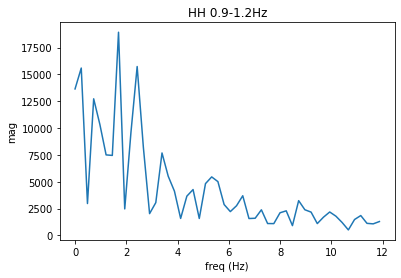

Text(0, 0.5, 'mag')

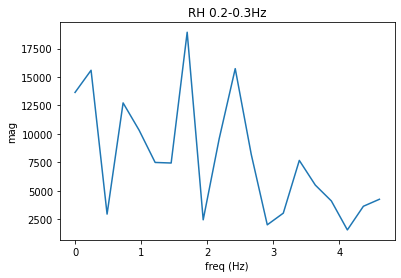

In [164]:
phase_shift_chart = out
freq_reso = 0.2423
plt.plot(np.arange(0,50)*freq_reso, np.abs(np.fft.fft(phase_shift_chart))[0:50])
plt.title("HH 0.9-1.2Hz")
plt.xlabel("freq (Hz)")
plt.ylabel("mag")
plt.show()
plt.plot(np.arange(0,20)*freq_reso, np.abs(np.fft.fft(phase_shift_chart))[0:20])
plt.title("RH 0.2-0.3Hz")
plt.xlabel("freq (Hz)")
plt.ylabel("mag")

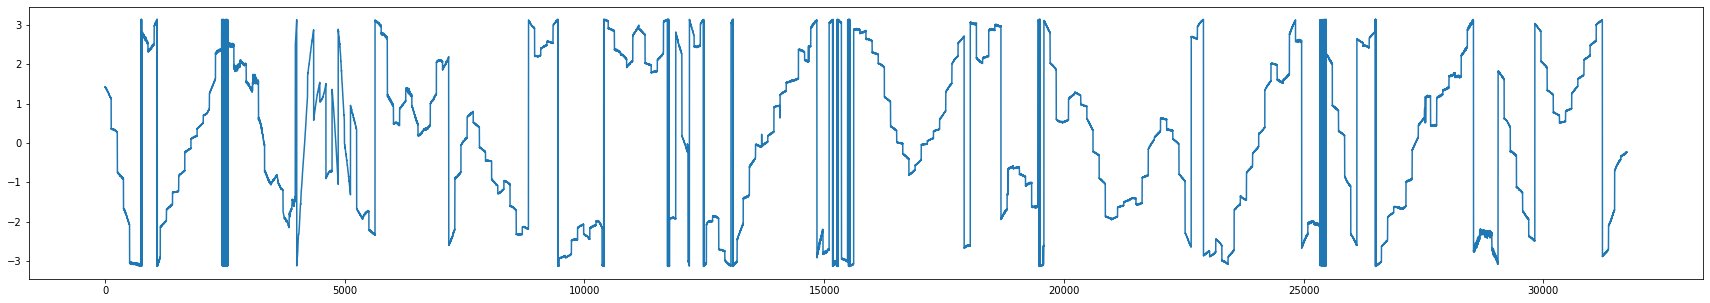

In [75]:
plt.figure(figsize=(30,5))
plt.plot(phase)